In [1]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib
import matplotlib
import pickle
from shutil import copyfile
from mpl_toolkits.axes_grid1 import ImageGrid
from skimage.filters import threshold_otsu as otsu
from scipy.ndimage.morphology import binary_erosion
from scipy.ndimage.morphology import binary_dilation

/home/users/brezovec/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning: Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function
  "Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function"


In [19]:
def binarize_image(data,scale,binarize):
    if binarize:
        threshold = otsu(data)*scale
        data_binarized = np.where(data>threshold, 1, 0)
        return data_binarized
    else:
        return data
    
def calc_centroid(binary_image):
    return scipy.ndimage.measurements.center_of_mass(binary_image)

def calc_centroid_alex(binary_image):
    return np.argwhere(binary_image==1).mean(0)
        
def plot_centroid(cx,cy,cz,axis,color='r',transpose=False):
    if axis==0:
        plt.scatter(cz,cy,color='k',linewidth=1.5)
        plt.scatter(cz,cy,color=color,linewidth=.5)
    elif axis==1:
        plt.scatter(cz,cx,color='k',linewidth=1.5)
        plt.scatter(cz,cx,color=color,linewidth=.5)
    elif axis==2:
        if transpose:
            plt.scatter(cx,cy,color='k',linewidth=1.5)
            plt.scatter(cx,cy,color=color,linewidth=.5)
        else:
            plt.scatter(cy,cx,color='k',linewidth=1.5)
            plt.scatter(cy,cx,color=color,linewidth=.5)
            
def draw_grid(vlines=5, hlines=5, lw=.5):
    for i in np.arange(0,vlines*20,20):
        plt.axvline(i,color='w',lw=lw)
    for i in np.arange(0,hlines*20,20):
        plt.axhline(i,color='w',lw=lw)
        
def clean_anat(brain):
    brain_copy = brain.copy().astype('float32')
    brain_copy = scipy.ndimage.filters.gaussian_filter(brain_copy, sigma=0.5)

    labels, label_nb = scipy.ndimage.label(brain_copy)
    brain_label = np.bincount(labels.flatten())[1:].argmax()+1

    brain_copy = np.where(labels==brain_label, 1.0, 0.0)

    return brain_copy*brain

# low res bifrost

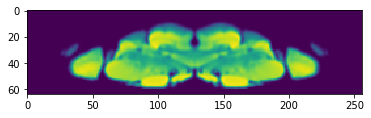

In [59]:
dir_ = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230712_bifrost_test/FDA.nii"
fda=ants.image_read(dir_)
plt.imshow(fda[:,38,:].T)

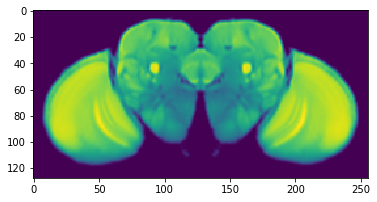

In [60]:
plt.imshow(fda[:,:,38].T)

In [57]:
dir_ = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230712_bifrost_test"
os.listdir(dir_)

['lc11_7.nii',
 'lc11_3.nii',
 'lc11_6.nii',
 'lc11_1.nii',
 'lc11_8.nii',
 'lc11_4.nii',
 'lc11_9.nii',
 'lc11_5.nii',
 'lc11_2.nii']

In [48]:
brains = []
for file in os.listdir(dir_):
    path = os.path.join(dir_,file)
    brains.append(ants.image_read(path).numpy())
brains = np.asarray(brains)
print(brains.shape)

(9, 256, 128, 64)


In [54]:
285*(.38/2.9)

37.3448275862069

In [57]:
def draw_grid(vlines=15, hlines=5, lw=.5, step=50*256/826):
    for i in np.arange(0,vlines*step,step):
        plt.axvline(i,color='w',lw=lw)
    for i in np.arange(0,hlines*step,step):
        plt.axhline(i,color='w',lw=lw)

In [ ]:
#256 across vs 826

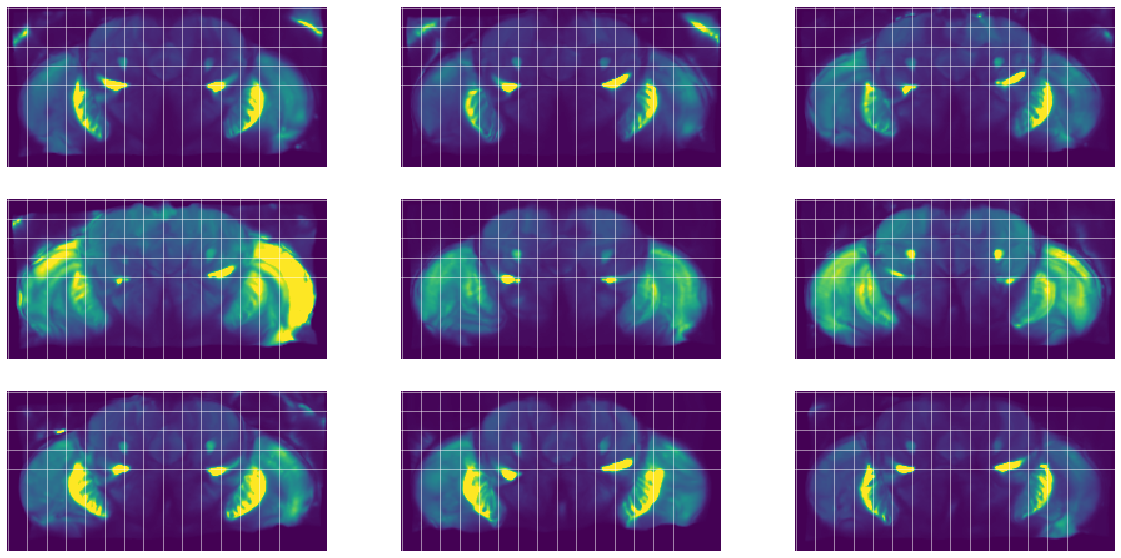

In [58]:
plt.figure(figsize=(20,10))
z=38
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(brains[i][:,:,z].T,vmax=0.1)
    plt.axis('off')
    draw_grid()

# full res bifrost

In [46]:
dir_ = "/oak/stanford/groups/trc/data/berger/registration/pipeline_dev/demo_dataset_unthresh/results/transformed_images"
os.listdir(dir_)

['fly_3',
 'fly_4',
 'fly_6',
 'fly_5',
 'fly_1',
 'fly_8',
 'fly_9',
 'fly_2',
 'fly_7']

In [51]:
brain = ants.image_read(path)
brain.shape

(256, 128, 64)

In [52]:
brains = []
for i in range(9):
    print(i)
    path = os.path.join(dir_,F'fly_{i+1}','green','lc11.nii')
    brain = ants.image_read(path)
    ### these are at 0.38, resample will make 0.76 which we use in paper
    #out = ants.resample_image(brain,(826, 384, 240),use_voxels=True)
    brains.append(brain.numpy())
brains = np.asarray(brains)
print(brains.shape)

0
1
2
3
4
5
6
7
8
(9, 256, 128, 64)


In [5]:

dir_ = "/oak/stanford/groups/trc/data/berger/registration/pipeline_dev/full_unthresh_clahe/results/transformed_images"


#dir_ = "/oak/stanford/groups/trc/data/berger/registration/pipeline_dev/full_alex_repro/results/transformed_images"

### OLD, Problematic
#dir_ = "/oak/stanford/groups/trc/data/berger/registration/pipeline_dev/full/results/transformed_images"

In [6]:
os.listdir(dir_)

['fly_3',
 'fly_4',
 'fly_6',
 'fly_5',
 'fly_1',
 'fly_8',
 'fly_9',
 'fly_2',
 'fly_7']

In [8]:
os.listdir(os.path.join(dir_,'fly_1','green'))

['lc11.nii']

In [21]:
path = os.path.join(dir_,F'fly_{i+1}','green','lc11.nii')
brain = ants.image_read(path)


In [7]:
brains = []
for i in range(9):
    print(i)
    path = os.path.join(dir_,F'fly_{i+1}','green','lc11.nii')
    brain = ants.image_read(path)
    ### these are at 0.38, resample will make 0.76 which we use in paper
    out = ants.resample_image(brain,(826, 384, 240),use_voxels=True)
    brains.append(out.numpy())
brains = np.asarray(brains)
print(brains.shape)

0
1
2
3
4
5
6
7
8
(9, 826, 384, 240)


In [58]:
for file in os.listdir(dir_):
    print(file)

210223_02_green_fda.nii
210223_04_green_fda.nii
210223_01_green_fda.nii
210208_03_green_fda.nii
210223_03_green_fda.nii
210216_04_green_fda.nii
210218_02_green_fda.nii
210216_02_green_fda.nii
210208_02_green_fda.nii


In [62]:
dir_ = "/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA_luke_pipeline"

brains = []
for file in os.listdir(dir_):
    path = os.path.join(dir_,file)
    print(path)
    brain = ants.image_read(path)
    ### these are at 0.38, resample will make 0.76 which we use in paper
    #out = ants.resample_image(brain,(826, 384, 240),use_voxels=True)
    brains.append(brain.numpy())
brains = np.asarray(brains)
print(brains.shape)

/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA_luke_pipeline/210223_02_green_fda.nii
/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA_luke_pipeline/210223_04_green_fda.nii
/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA_luke_pipeline/210223_01_green_fda.nii
/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA_luke_pipeline/210208_03_green_fda.nii
/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA_luke_pipeline/210223_03_green_fda.nii
/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA_luke_pipeline/210216_04_green_fda.nii
/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA_luke_pipeline/210218_02_green_fda.nii
/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA_luke_pipeline/210216_02_green_fda.nii
/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA_luke_pipeline/210208_02_green_fda.nii
(

In [24]:
def draw_grid(vlines=15, hlines=5, lw=.5, step=50):
    for i in np.arange(0,vlines*step,step):
        plt.axvline(i,color='w',lw=lw)
    for i in np.arange(0,hlines*step,step):
        plt.axhline(i,color='w',lw=lw)

In [ ]:
#256 across vs 826

In [11]:
30*826/256

96.796875

In [12]:
479-(97*2)

285

In [13]:
brains[0].shape

(826, 384, 240)

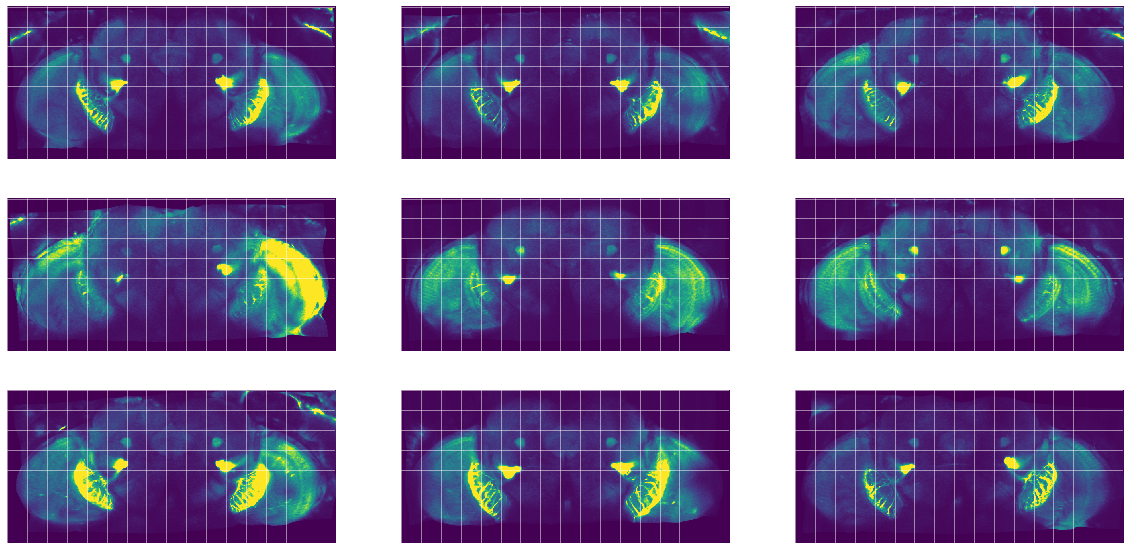

In [38]:
plt.figure(figsize=(20,10))
z=240-97
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(brains[i][:,:,z].T,vmax=0.1)
    plt.axis('off')
    draw_grid()

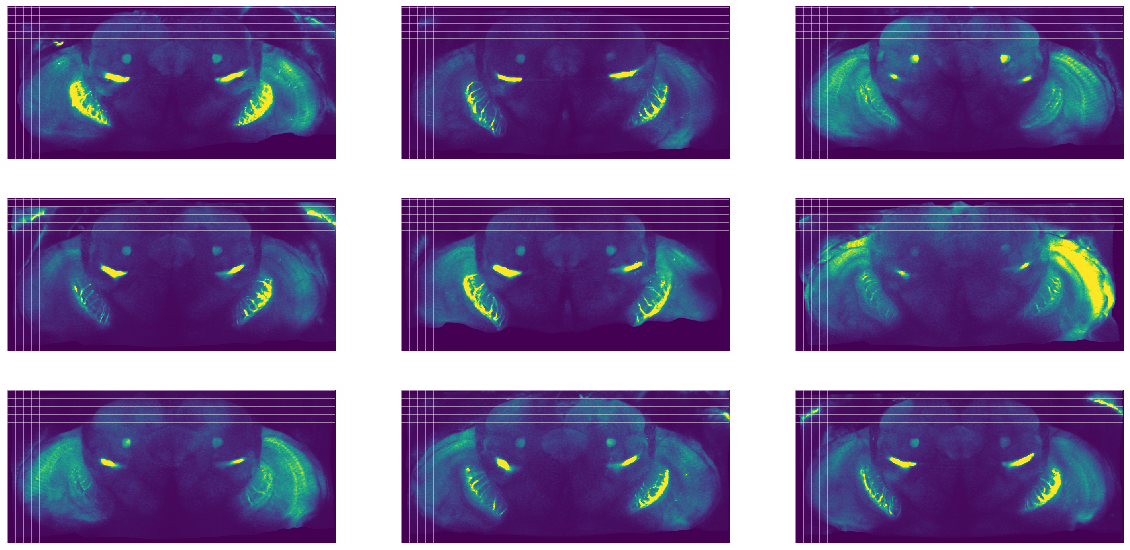

In [63]:
plt.figure(figsize=(20,10))
z=100#285
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(brains[i][:,:,z].T,vmax=0.1)
    plt.axis('off')
    draw_grid()

In [70]:
template = "/oak/stanford/groups/trc/data/berger/registration/pipeline_dev/full/templates/FDA.nii"
FDA = ants.image_read(template).numpy()

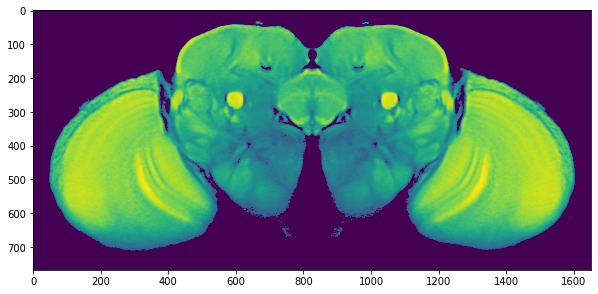

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(FDA[:,:,285].T)

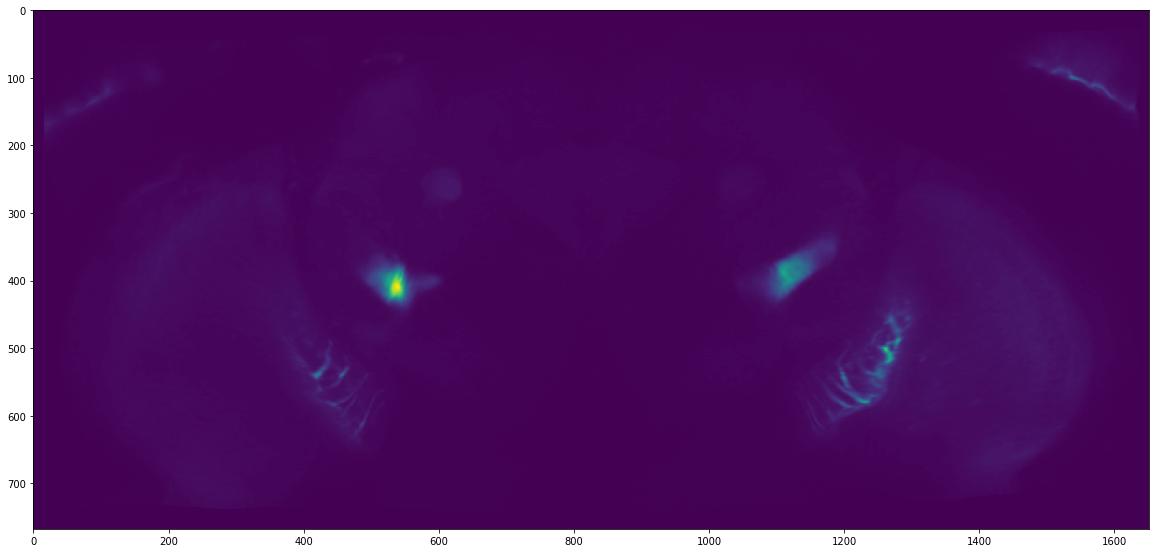

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(brains[0][:,:,250].T)

In [27]:
meanbrain_full = np.mean(brains,axis=0)

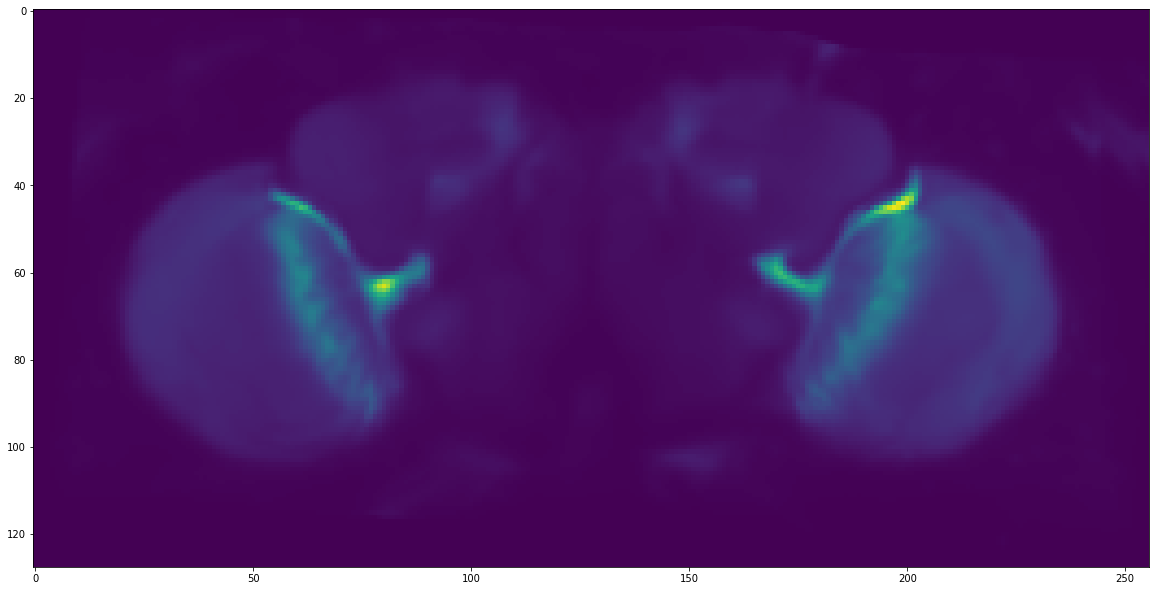

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(meanbrain_full[:,:,50].T)

In [20]:
# bbox = {'x_start': 70, 'x_end': 120,
#         'y_start': 50, 'y_end': 80,
#         'z_start': 20, 'z_end': 50}

In [26]:
bbox = {'x_start': 200, 'x_end': 325,
        'y_start': 150, 'y_end': 225,
        'z_start': 40, 'z_end': 140}

##################
### load masks ###
##################

pvlp_mask = "/oak/stanford/groups/trc/data/Alex/ROI_masks/pvlp_and_plp.nii"
pvlp_mask = ants.image_read(pvlp_mask).numpy()
mask_eroded = binary_erosion(pvlp_mask, structure=np.ones((2,2,2)))
mask_dilated = binary_dilation(mask_eroded, iterations=2)
pvlp_mask_cropped = mask_dilated[bbox['x_start']:bbox['x_end'],
                               bbox['y_start']:bbox['y_end'],
                               bbox['z_start']:bbox['z_end']]

In [55]:
brains[i].shape

(826, 384, 240)

In [27]:
brains_cropped = []
for i in range(len(brains)):
    brains_cropped.append(brains[i][:,:,::-1][bbox['x_start']:bbox['x_end'],
               bbox['y_start']:bbox['y_end'],
               bbox['z_start']:bbox['z_end']])

In [28]:
def binarize_image(data,scale,binarize):
    if binarize:
        threshold = otsu(data)*scale
        data_binarized = np.where(data>threshold, 1, 0)
        return data_binarized
    else:
        return data

In [30]:
########################################################
### Generate normalized mean images of green channel ###
########################################################

meanbrain = np.zeros(brains_cropped[0].shape)
for i in range(len(brains_cropped)):
    max_value = np.max(brains_cropped[i])
    if max_value == 0:
        max_value = 1            
    meanbrain += brains_cropped[i]/max_value

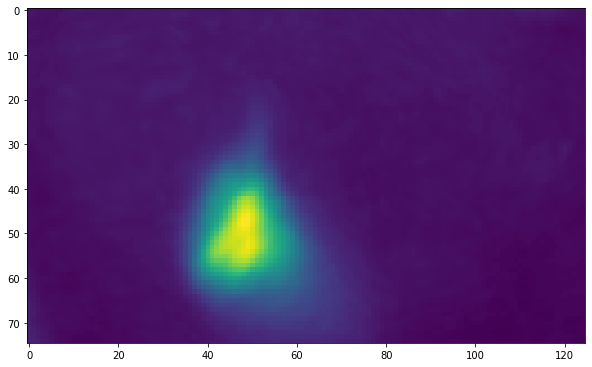

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(meanbrain[:,:,70].T)

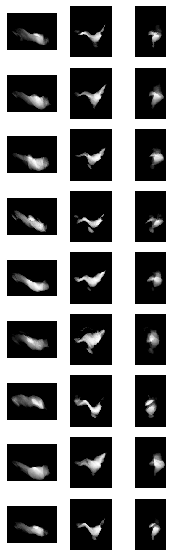

In [34]:
plt.figure(figsize=(3,10))
thresh_scales = [1,1,1,1,1,1,1,1,1]
binarize=True
for i in range(len(brains_cropped)):
    for axis in [0,1,2]:
        plt.subplot(9,3,(3*i+axis)+1)
        binary_image = binarize_image(brains_cropped[i],thresh_scales[i],binarize)
        binary_image*=pvlp_mask_cropped
        binary_image = clean_anat(binary_image)
        plt.imshow(np.mean(binary_image,axis=axis),cmap='Greys_r')
        #draw_grid()
        plt.axis('off')
        #cx,cy,cz = calc_centroid(binary_image)
        #plot_centroid(cx,cy,cz,axis)

# OG

In [32]:
def load_FDA():
    FDA_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine.nii'
    FDA = np.asarray(nib.load(FDA_file).get_fdata().squeeze(), dtype='float32')
    FDA = ants.from_numpy(FDA)
    FDA.set_spacing((.38,.38,.38))
    #FDA_lowres = ants.resample_image(FDA,(2,2,2),use_voxels=False)
    FDA_lowres = ants.resample_image(FDA,(.76,.76,.76),use_voxels=False)
    return FDA, FDA_lowres

FDA, FDA_lowres = load_FDA()

In [33]:
FDA.shape, FDA_lowres.shape

((1652, 768, 479), (826, 384, 240))

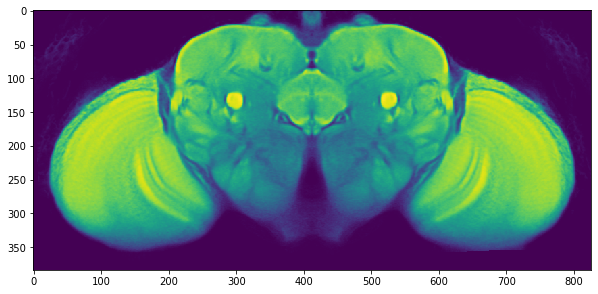

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(FDA_lowres[:,:,240-97].T)

In [16]:
dir_ = "/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/synthmorph_to_FDA"

In [17]:
brains_OG = []
files = [x for x in os.listdir(dir_)]
for file in files:
    print(file)
    to_load = os.path.join(dir_,file)
    image = ants.image_read(to_load)
    brains_OG.append(image)

210216_04_fda.nii
210223_01_fda.nii
210208_02_fda.nii
210218_02_fda.nii
210208_03_fda.nii
210223_02_fda.nii
210216_02_fda.nii
210223_04_fda.nii
210223_03_fda.nii


In [18]:
brains_OG[0].shape

(826, 384, 240)

In [19]:
def draw_grid(vlines=15, hlines=5, lw=.5, step=50):
    for i in np.arange(0,vlines*step,step):
        plt.axvline(i,color='w',lw=lw)
    for i in np.arange(0,hlines*step,step):
        plt.axhline(i,color='w',lw=lw)

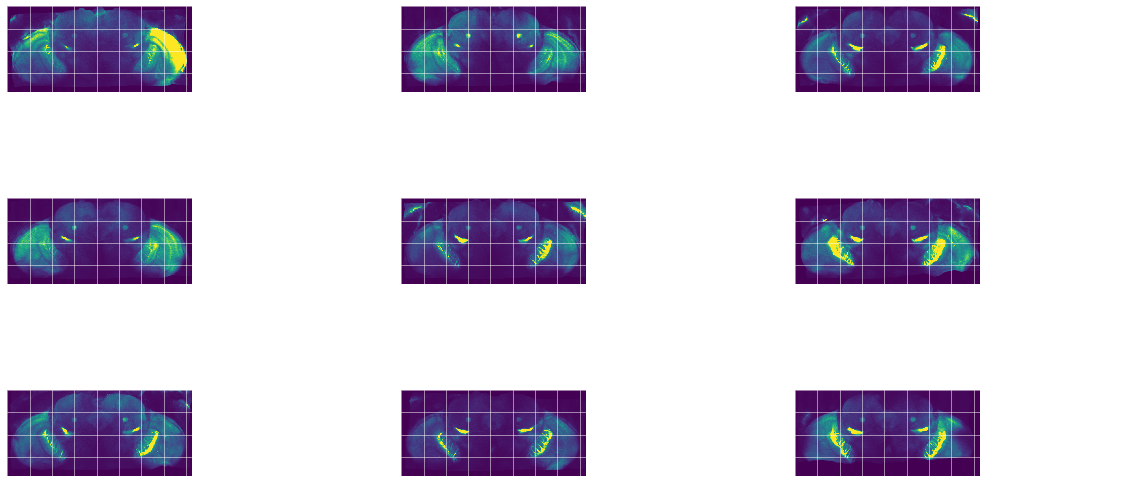

In [39]:
plt.figure(figsize=(20,10))
z=97
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(brains_OG[i][:,:,z].T,vmax=.1)
    plt.axis('off')
    draw_grid()

In [88]:
temp = []
for i in range(9):
    file = F"/oak/stanford/groups/trc/data/berger/registration/pipeline_dev/full/results/transformed_images/fly_{i+1}/green/lc11.nii"
    temp.append(ants.image_read(file).numpy())

In [22]:
def draw_grid(vlines=15, hlines=5, lw=.5, step=100):
    for i in np.arange(0,vlines*step,step):
        plt.axvline(i,color='w',lw=lw)
    for i in np.arange(0,hlines*step,step):
        plt.axhline(i,color='w',lw=lw)

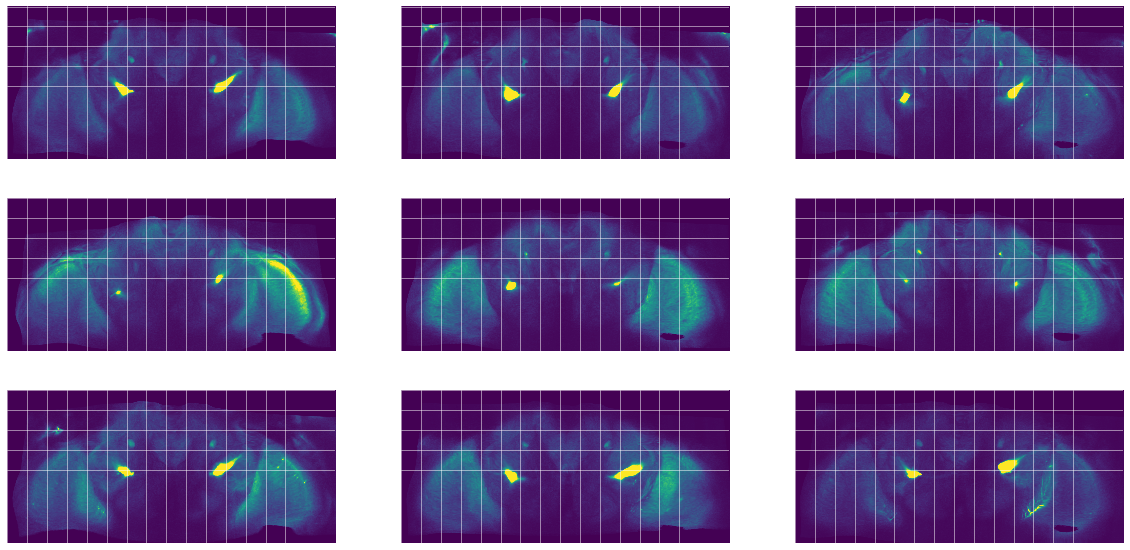

In [104]:
plt.figure(figsize=(20,10))
z=200
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(temp[i][:,:,z].T,vmax=.1)
    plt.axis('off')
    draw_grid()

In [80]:
temp.shape

(1652, 768, 479)

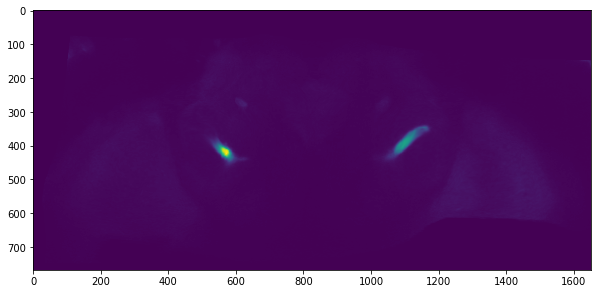

In [86]:
plt.figure(figsize=(10,10))
plt.imshow(temp[:,:,180].T)

In [38]:
########################################################
### Generate normalized mean images of green channel -      NOT CROPPED
########################################################


meanbrain = np.zeros(brains[0].shape)
for i in range(len(brains)): 
    meanbrain += brains[i]

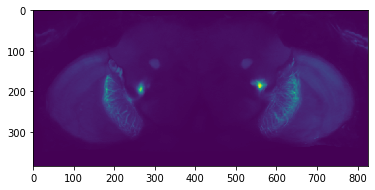

In [40]:
plt.imshow(meanbrain[:,:,240-80].T)